In [1]:
# pip install matplotlib pandas seaborn missingno plotly scikit-learn xgboost catboost lightgbm

# Importing Libraries

In [118]:
import warnings
warnings.simplefilter(action='ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.exceptions import ConvergenceWarning
import tkinter
from collections import Counter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# %matplotlib inline

# Loading Dataset

In [119]:
df1 = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


# Explorartory Data Analysis

In [120]:
df = df1.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [121]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.5,No


In [122]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762
std,0.369,24.559,30.090
min,0.000,0.000,18.250
25%,0.000,9.000,35.500
50%,0.000,29.000,70.350
75%,0.000,55.000,89.850
max,1.000,72.000,118.750


In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750


In [124]:
df.shape

(7043, 21)

In [125]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [126]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [127]:
df.duplicated().sum()

0

In [128]:
def check_df(dataframe, head=10):
    
    print('\033[1m' + 20*"*" + ' SHAPE ' + 20*"*" + '\033[0m')
    print(dataframe.shape)
    
    print('\033[1m' + 20*"*" + ' TYPES ' + 20*"*" + '\033[0m')
    print(dataframe.dtypes)
    
    print('\033[1m' + 20*"*" + ' NA ' + 20*"*" + '\033[0m')
    print(dataframe.isnull().sum())
    
    print('\033[1m' + 20*"*" + ' DUPLICATED VALUE ' + 20*"*" + '\033[0m')
    print(dataframe.duplicated().sum())
    
check_df(df)

******************** SHAPE ********************
(7043, 21)
******************** TYPES ********************
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
******************** NA ********************
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
Devi

### Data Cleaning

In [129]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [130]:
# Making the necessary arrangements
# Since we do not need the CustomerID variable, we omitted it from the dataset.
df = df.drop(['customerID'], axis = 1)

# We converted the Churn variable as we wanted to see it as 1/0 instead of yes/no.
df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})

# We converted the TotalCharges variable to a numeric variable.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

# SeniorCitizen variable should be object not integer, we changed that too.
df["SeniorCitizen"] = df["SeniorCitizen"].astype("O")

In [131]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


In [132]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [133]:
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
0   73.463
1   26.537
Name: count, dtype: float64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [135]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [136]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [137]:
df.duplicated().sum()

22

In [138]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


In [139]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
            df: Dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                threshold value for numeric but categorical variables
        car_th: int, optinal
                threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical but cardinal variable list

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [140]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [141]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [142]:
df.skew(numeric_only=True)

tenure            0.240
MonthlyCharges   -0.221
TotalCharges      0.962
Churn             1.063
dtype: float64

In [143]:
df.corr(numeric_only=True)

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000,0.248,0.826,-0.352
MonthlyCharges,0.248,1.000,0.651,0.193
TotalCharges,0.826,0.651,1.000,-0.199
Churn,-0.352,0.193,-0.199,1.000


# Data Visualization

### Feature distribution

In [144]:
df[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000,7043.000,7032.000
mean,32.371,64.762,2283.300
std,24.559,30.090,2266.771
min,0.000,18.250,18.800
25%,9.000,35.500,401.450
50%,29.000,70.350,1397.475
75%,55.000,89.850,3794.738
max,72.000,118.750,8684.800


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

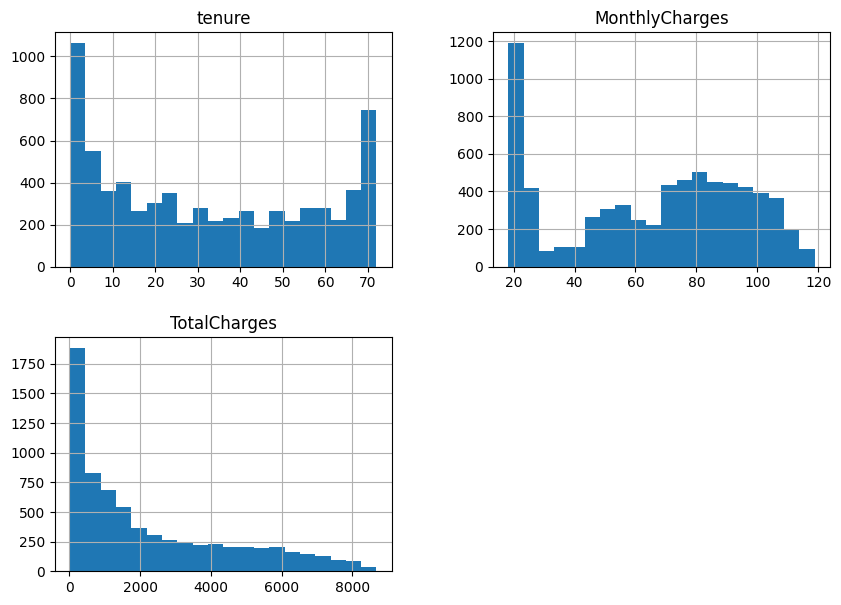

In [152]:
df[num_cols].hist(bins=20, figsize=(10,7))

In [155]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


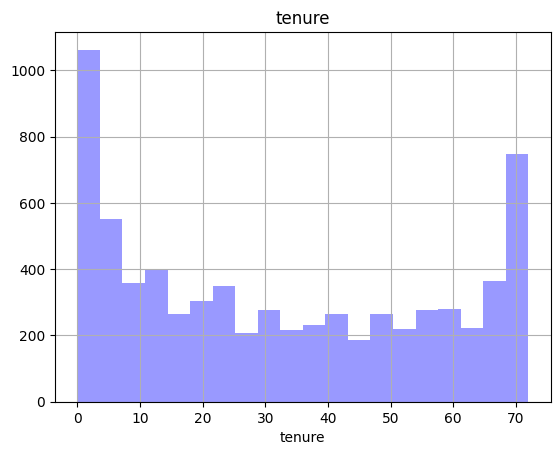

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


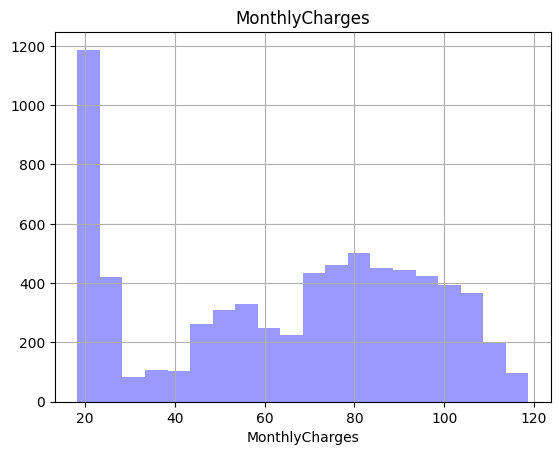

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


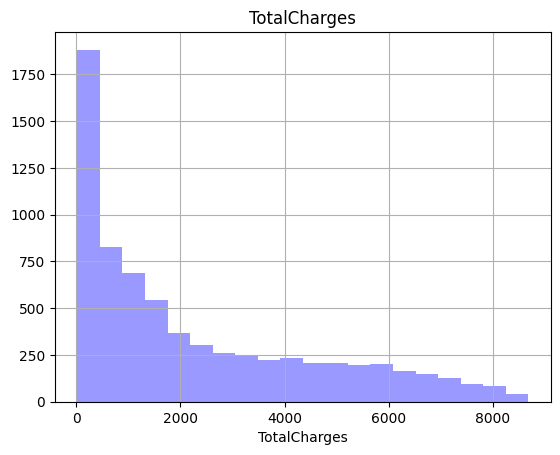

In [157]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20, alpha=0.4, color='b')
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
        
for col in num_cols:
    num_summary(df, col, plot=True)

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

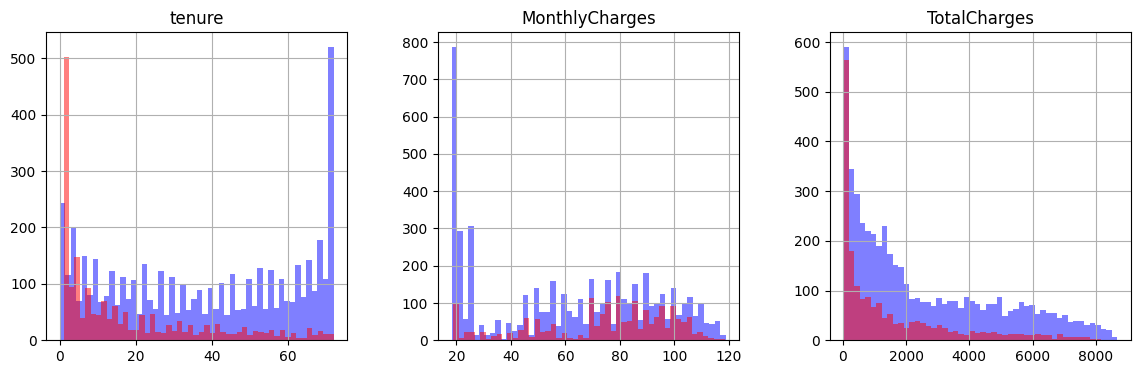

In [156]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == 0][num_cols].hist(bins=50, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 1][num_cols].hist(bins=50, color="red", alpha=0.5, ax=ax)

### Categorical feature distribution

In [161]:
type(cat_cols)
enumerate(cat_cols)

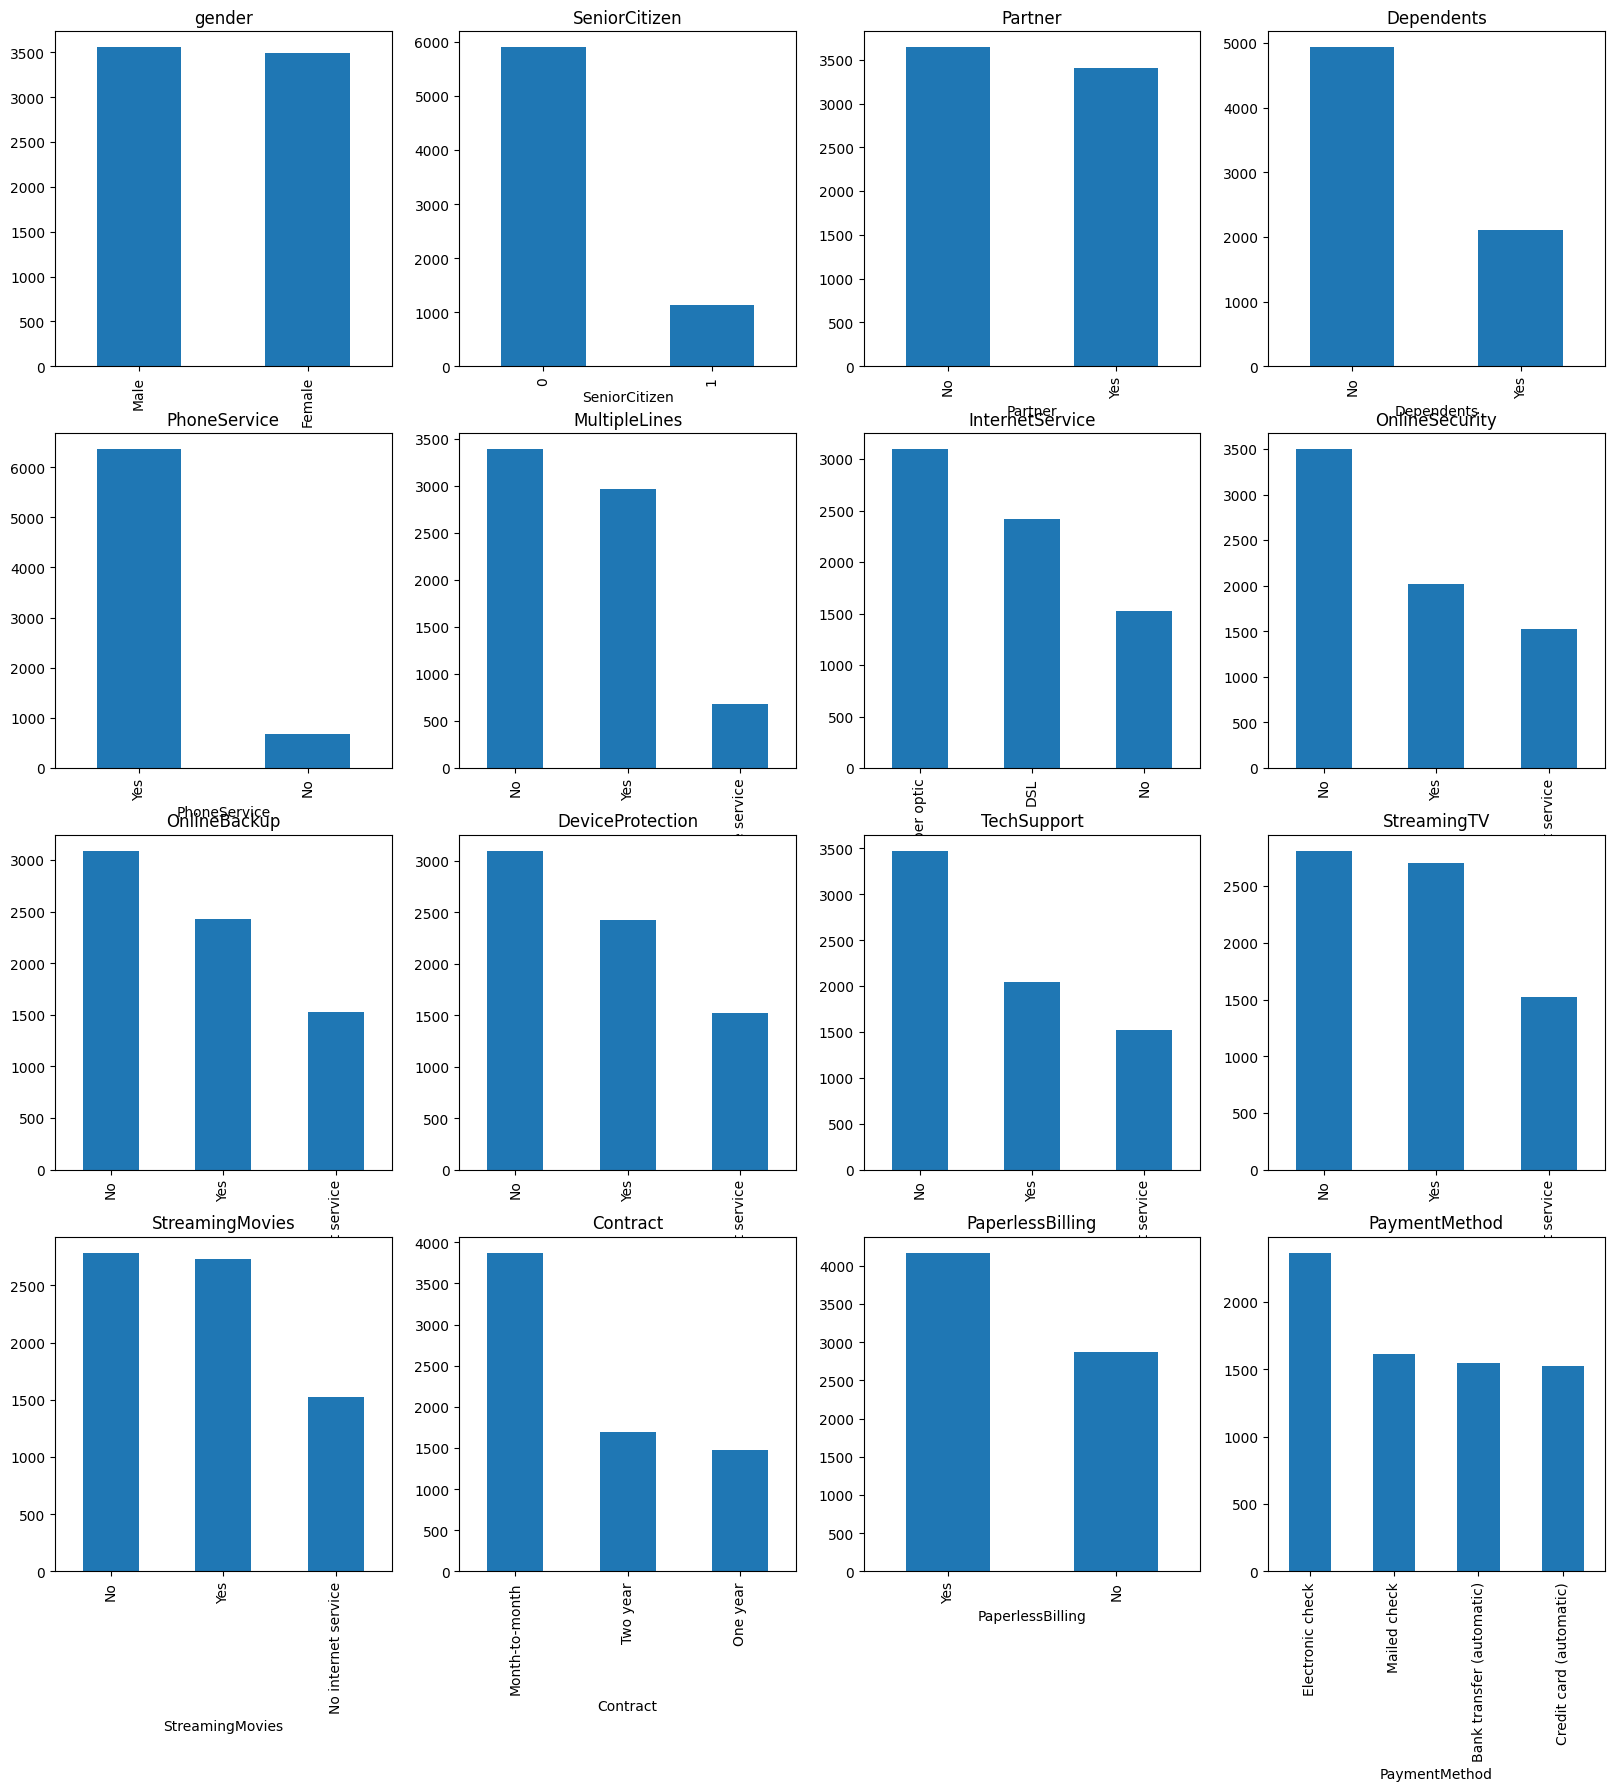

In [169]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(20,20))
row, col = 0, 0,
for i, categorical_feature in enumerate(cat_cols[:-1]):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

##################### gender ############################
        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524


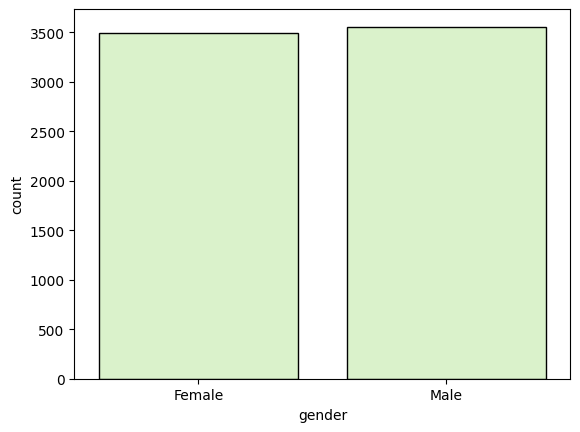

##################### SeniorCitizen ############################
               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215


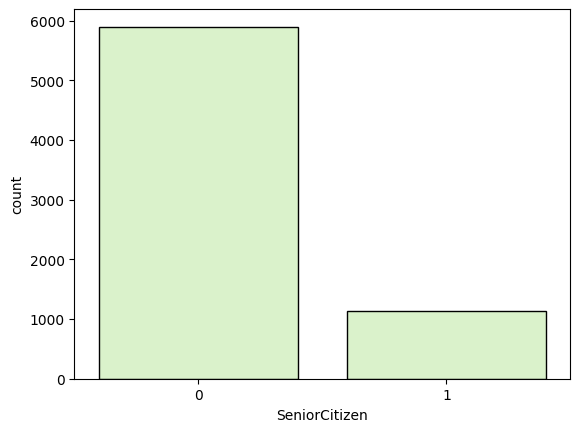

##################### Partner ############################
         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303


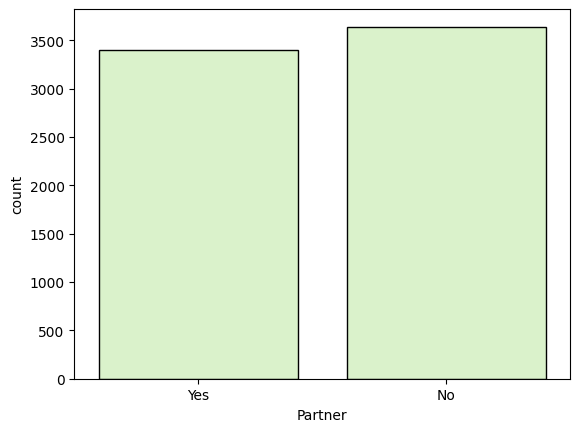

##################### Dependents ############################
            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959


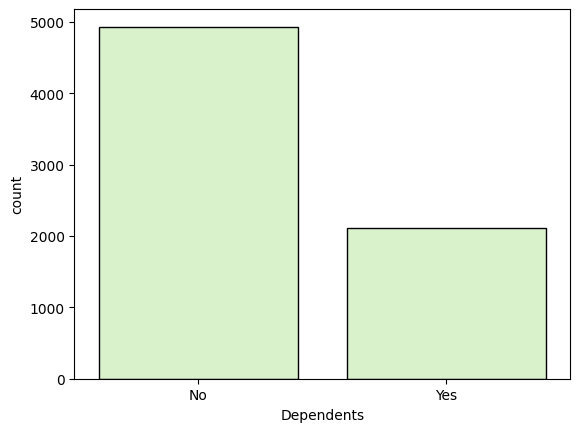

##################### PhoneService ############################
              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683


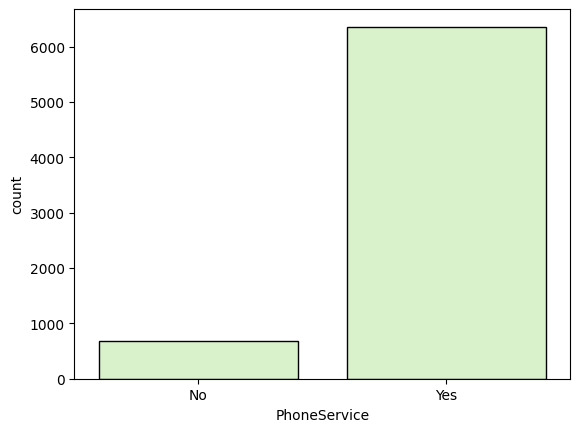

##################### MultipleLines ############################
                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683


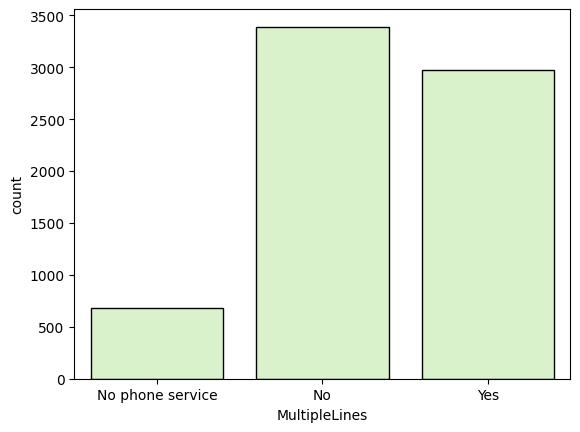

##################### InternetService ############################
                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667


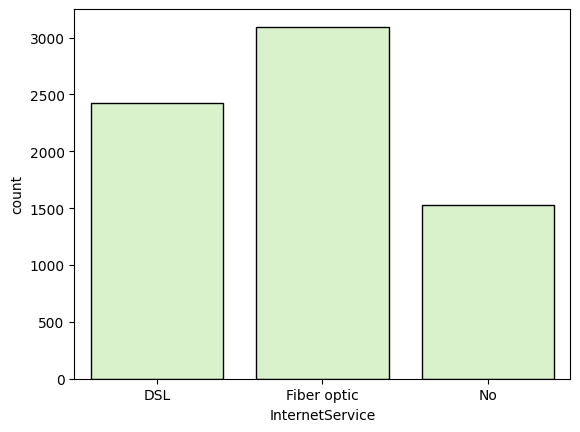

##################### OnlineSecurity ############################
                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667


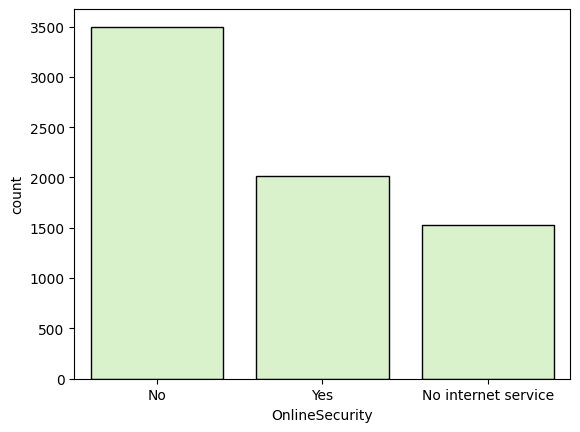

##################### OnlineBackup ############################
                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667


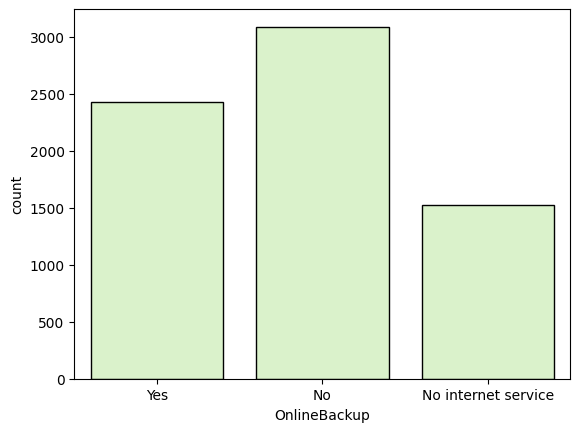

##################### DeviceProtection ############################
                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667


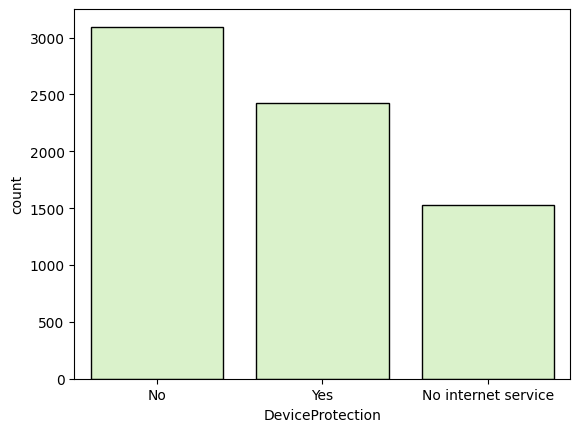

##################### TechSupport ############################
                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667


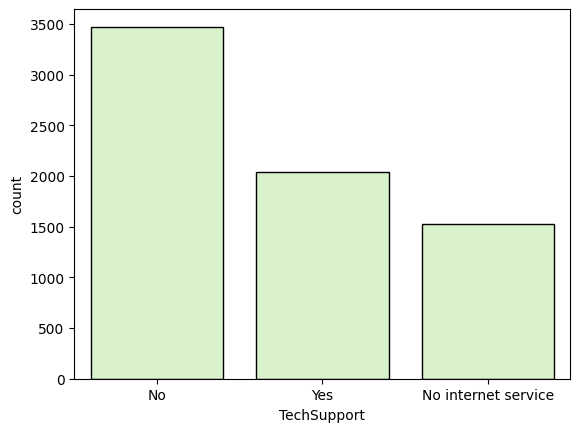

##################### StreamingTV ############################
                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667


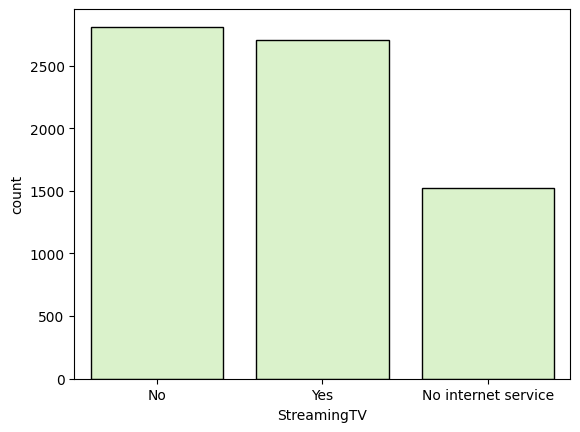

##################### StreamingMovies ############################
                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667


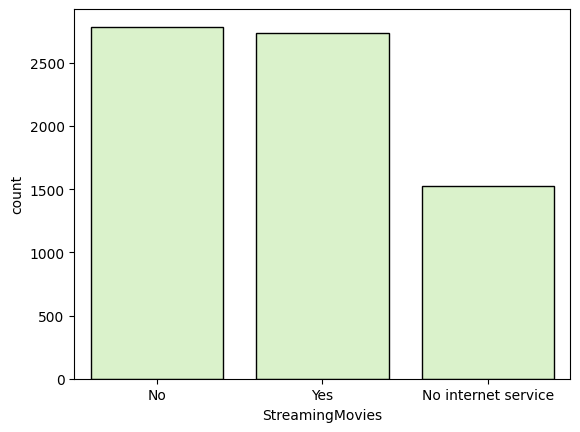

##################### Contract ############################
                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914


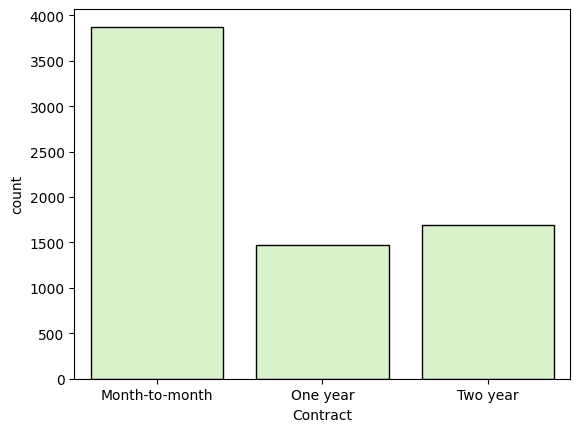

##################### PaperlessBilling ############################
                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171 59.222
No                            2872 40.778


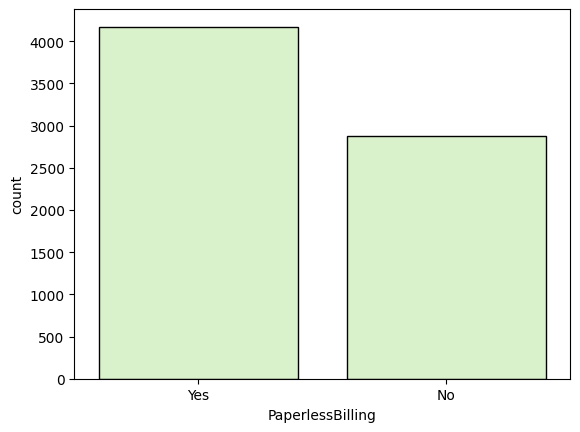

##################### PaymentMethod ############################
                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610


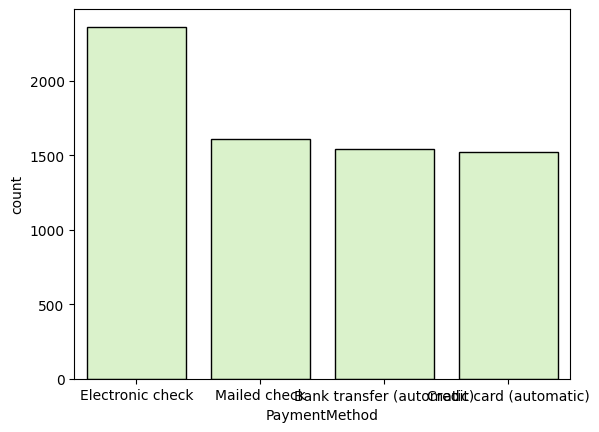

##################### Churn ############################
       Churn  Ratio
Churn              
0       5174 73.463
1       1869 26.537


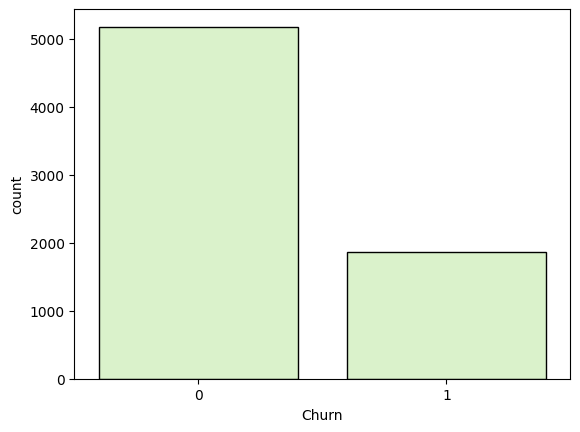

In [34]:
def cat_summary(dataframe, col_name, plot = False):
    print('#####################',col_name,'############################')
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio':100 * dataframe[col_name].value_counts()/len(dataframe)}))
    
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe, edgecolor='black', color='#D9F9C4')
        plt.show(block = True)
        
for col in cat_cols:
    cat_summary(df, col, plot = True)

Text(0.5, 1.0, 'churned')

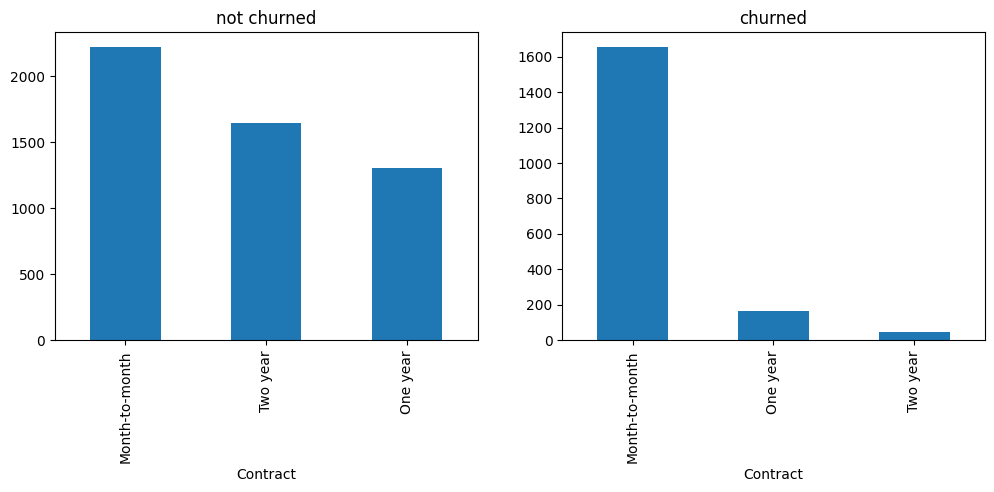

In [171]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == 0][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == 1][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

In [37]:
from plotly.subplots import make_subplots

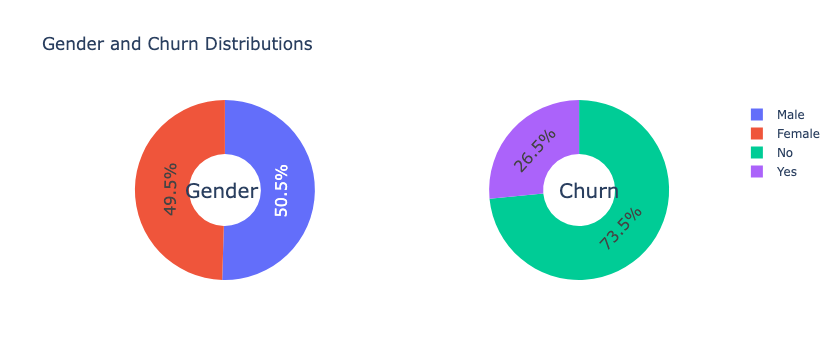

In [38]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [203]:
def target_summary_with_cat(dataframe,target,categorical_col):
    print(pd.DataFrame({"CHURN_MEAN": dataframe.groupby(categorical_col)[target].mean()}))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

for col in cat_cols:
    target_summary_with_cat(df,"Churn",col)

        CHURN_MEAN
gender            
Female       0.269
Male         0.262
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               CHURN_MEAN
SeniorCitizen            
0                   0.236
1                   0.417
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
         CHURN_MEAN
Partner            
No            0.330
Yes           0.197
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            CHURN_MEAN
Dependents            
No               0.313
Yes              0.155
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              CHURN_MEAN
PhoneService            
No                 0.249
Yes                0.267
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                  CHURN_MEAN
MultipleLines               
No                     0.250
No phone service       0.249
Yes                    0.286
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 CHURN_MEAN
InternetService            
DSL                   0.190
Fiber optic           0.419
No                    0.074
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [204]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [205]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [206]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [207]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

              n_miss  ratio
TotalCharges      11  0.160


In [208]:
# Filling in missing values with the median

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

df['TotalCharges'].isnull().sum()

0

<Axes: >

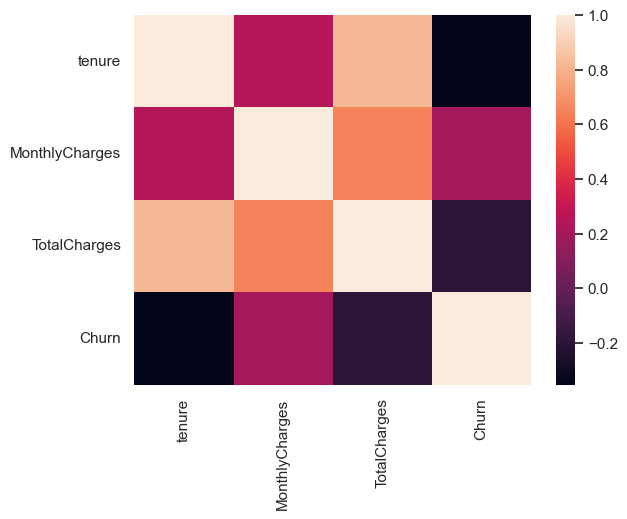

In [209]:
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges','Churn']].corr())

IT IS LOGICAL THAT THERE IS A HIGH CORRELATION BETWEEN TENURE AND TOTALCHARGES BECAUSE AS THE TENURE, I.e., TOTAL SERVICE PROVIDED MONTH INCREASES, THE AMOUNT COLLECTED ALSO INCREASES.

In [210]:
df.loc[((df["gender"] == "Male") & (df["SeniorCitizen"]== 1)),"SENIOR/YOUNG_GENDER"] = "senior_male"
df.loc[((df["gender"] == "Female") & (df["SeniorCitizen"]== 0)),"SENIOR/YOUNG_GENDER"] ="young_male"
df.loc[((df["gender"] == "Male") & (df["SeniorCitizen"]== 1)),"SENIOR/YOUNG_GENDER"] ="senior_female"
df.loc[((df["gender"] == "Female") & (df["SeniorCitizen"]== 0)),"SENIOR/YOUNG_GENDER"] ="young_female"


df.loc[((df["gender"] == "Male") & (df["TechSupport"] == "No")),"GENDER_SUPPORT"] = "no_sup_male"
df.loc[((df["gender"] == "Female") & (df["TechSupport"] == "No")),"GENDER_SUPPORT"] = "no_sup_female"


df.loc[((df["Contract"] == "Month-to-month")
       & (df["PaymentMethod"] == "Electronic check")
       & (df["gender"] == "Male")),"GENDER_EC_MONTH"] = "male_ec_month"

df.loc[((df["Contract"] == "Month-to-month")
       & (df["PaymentMethod"] == "Electronic check")
       & (df["gender"] == "Female")),"GENDER_EC_MONTH"] = "female_ec_month"


df.loc[((df["OnlineSecurity"] == "No") & (df["gender"] == "Female")), "GENDER_SECURITY"] = "no_sec_female"
df.loc[((df["OnlineSecurity"] == "Yes") & (df["gender"] == "Female")),"GENDER_SECURITY"] = "yes_sec_female"
df.loc[((df["OnlineSecurity"] == "No") & (df["gender"] == "Male")),"GENDER_SECURITY"] = "no_sec_male"
df.loc[((df["OnlineSecurity"] == "Yes") & (df["gender"] == "Male")),"GENDER_SECURITY"] = "yes_sec_male"


df.loc[((df["InternetService"] == "Fiber optic")
       & (df["gender"] == "Male")
       & (df["Dependents"] == "No")),"GENDER_FIB_DEP"] = "male_fib_dep_no"

df.loc[((df["InternetService"] == "Fiber optic")
       & (df["gender"] == "Female")
       & (df["Dependents"] == "No")),"GENDER_FIB_DEP"] = "female_fib_dep_no"

df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"


df.loc[((df["Partner"] == "No") & (df["Contract"] == "Month-to-month")),"PARTNER_CONTR"] = "no_partner_month"
df.loc[((df["Partner"] == "Yes") & (df["Contract"] == "Month-to-month")),"PARTNER_CONTR"] = "yes_partner_month"

In [211]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 27
cat_cols: 24
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [212]:
le = LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


for col in binary_cols:
    df = label_encoder(df, col)

In [213]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 30 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols)

In [214]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277,-1.160,-0.994
1,0.066,-0.260,-0.173
2,-1.237,-0.363,-0.960
3,0.514,-0.747,-0.195
4,-1.237,0.197,-0.940


In [215]:
y = df["Churn"]
X = df.drop(["Churn"], axis=1)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_models(X, y, scoring="accuracy")

In [232]:
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500]}


classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]

In [233]:
def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [234]:
def fit_models(X,y):
    base_models(X, y)
    best_models = hyperparameter_optimization(X, y)
    return best_models

best_models = fit_models(X_train, y_train)

Base Models....
roc_auc: 0.8403 (LR) 
roc_auc: 0.7827 (KNN) 
roc_auc: 0.6498 (CART) 
roc_auc: 0.8182 (RF) 
roc_auc: 0.8371 (Adaboost) 
roc_auc: 0.8383 (GBM) 
roc_auc: 0.8114 (XGBoost) 
roc_auc: 0.8356 (CatBoost) 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 998, number of negative: 2758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265708 -> initscore=-1.016508
[LightGBM] [Info] Start training from score -1.016508
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[Light

In [235]:
lgbm_model = best_models['LightGBM'].fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


In [236]:
y_pred = lgbm_model.predict(X_test)
y_prob = lgbm_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



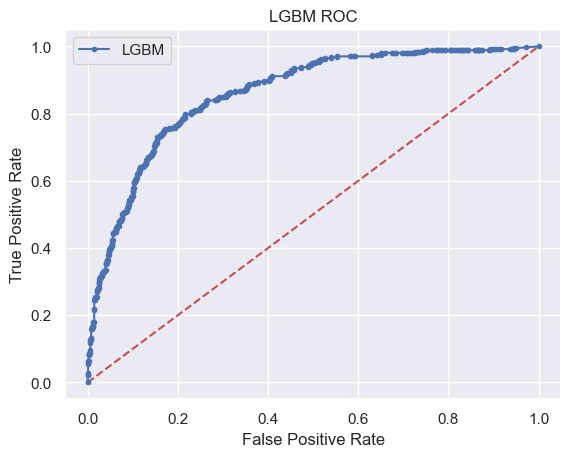

In [237]:
lgbm_roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, marker='.', label='LGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("LGBM ROC")
plt.legend()
plt.show()

In [238]:
X.columns
random_user = X.sample(1, random_state = 42)
lgbm_model.predict(random_user)

array([1])

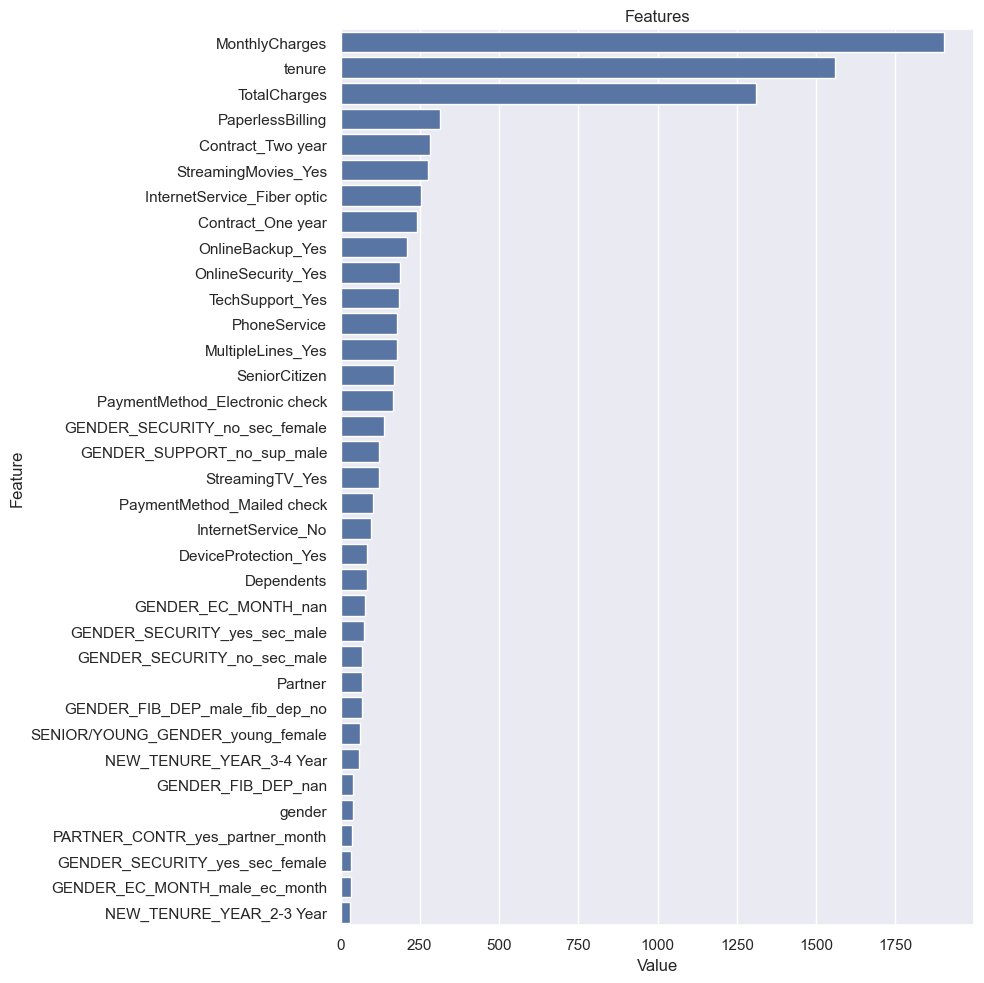

In [239]:
# Observing the variables that affect the success of our model

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(lgbm_model, X_train, num=35)

In [240]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SENIOR/YOUNG_GENDER_senior_female,SENIOR/YOUNG_GENDER_young_female,GENDER_SUPPORT_no_sup_female,GENDER_SUPPORT_no_sup_male,GENDER_EC_MONTH_male_ec_month,GENDER_EC_MONTH_nan,GENDER_SECURITY_no_sec_female,GENDER_SECURITY_no_sec_male,GENDER_SECURITY_yes_sec_female,GENDER_SECURITY_yes_sec_male,GENDER_FIB_DEP_male_fib_dep_no,GENDER_FIB_DEP_nan,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,PARTNER_CONTR_no_partner_month,PARTNER_CONTR_yes_partner_month
0,0,0,1,0,-1.277,0,1,-1.160,-0.994,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True
1,1,0,0,0,0.066,1,0,-0.260,-0.173,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False
2,1,0,0,0,-1.237,1,1,-0.363,-0.960,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False
3,1,0,0,0,0.514,0,0,-0.747,-0.195,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False
4,0,0,0,0,-1.237,1,1,0.197,-0.940,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
